<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/Support_Vector_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#In support vector algorithm we try to find the best possible line that will segregate the boundaries between two given variables.
#Here multiple lines are drawn to check for the accuracy of the drawn line that is the line that best fits in the graph to separate the two variables
#Also the best line is calculated by minimizing the distance between the two nearest variables so that better accuracy is achieved
#Here are two terms that we need to follow- High regularization and low regularization. In high regularization the line completely divides the two variables but the line is not linear and moreover it forms a different shape that is not soothing to the eye
#In low regularization the line is a linear one the only drawback is some variables of the other part gets mixed with other part variables but, it is not an issue and it is mainly preffered to go with low regularization
#regularzation constant is denoted by the letter C

#z= x**2 + y**2-------> method to find the z axis  also called kernel




In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df["target"]= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
#Here possible values of target is 0,1 and 2 and we need to find/predict the target value of the given dataset
#The target values are basically the types of iris of iris flowers based on certain mentioned parameters above.


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [0]:
#Adding one more column to the table called flower name in which target name will be used

In [11]:
df["flower_name"]= df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df0= df[df["target"]==0]
df1= df[df["target"]==1]
df2= df[df["target"]==2]

In [14]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Text(0, 0.5, 'sepal width (cm)')

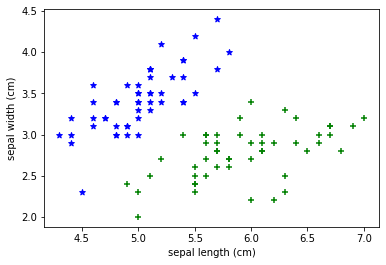

In [15]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], marker="*",color="blue")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], marker="+",color="green")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")


Text(0, 0.5, 'petal width (cm)')

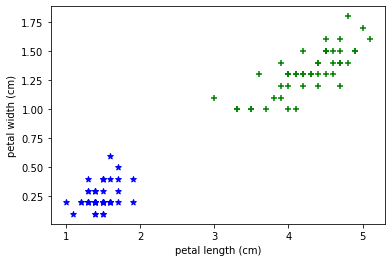

In [16]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], marker="*",color="blue")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], marker="+",color="green")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")


In [0]:
#based on the above two graphs we can say a proper line can be drawn between them and can be used to train the model

In [18]:
X= df.drop(df[["target", "flower_name"]], axis="columns")
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y= df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=10)



In [21]:
len(X_train)

105

In [22]:
len(X_test)

45

In [23]:
len(y_test)

45

In [0]:
from sklearn.svm import SVC
#https://www.environment.nsw.gov.au/resources/salinity/allaboutsalinity.pdf

In [25]:
model= SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_predict= model.predict(X_test)
y_predict

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [27]:
model.score(X_test, y_test)

1.0

In [28]:
model= SVC(C=10, kernel= "linear")
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
model.score(X_test, y_test)

1.0

In [35]:
y_predict= model.predict(X_test)
y_predict

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [36]:
model.predict([[1,2,3,4]])

array([2])

In [0]:
#Types of kernels that we can use 

#linear, poly, rbf, sigmoid, precomputed, callable

In [0]:
#C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data.

In [34]:
def add(a,b):
  return sum([a,b])

print(add(5,5))

10
